# Librairies

In [386]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import data

In [387]:
data = pd.read_csv("iris.csv", sep =";")

# Data viz

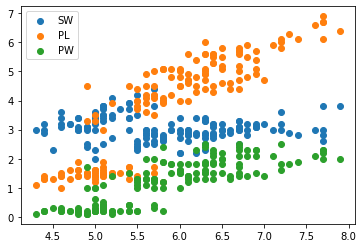

In [388]:
plt.figure()
plt.scatter(data.SL, data.SW)
plt.scatter(data.SL, data.PL)
plt.scatter(data.SL, data.PW)
plt.legend(["SW", "PL", "PW"])
plt.show()

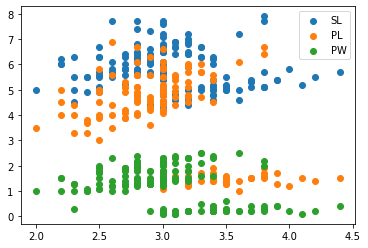

In [389]:
plt.figure()
plt.scatter(data.SW, data.SL)
plt.scatter(data.SW, data.PL)
plt.scatter(data.SW, data.PW)
plt.legend(["SL", "PL", "PW"])
plt.show()

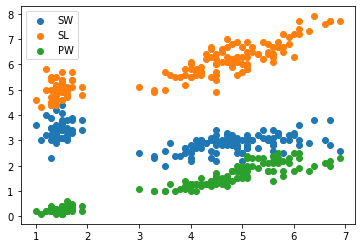

In [390]:
plt.figure()
plt.scatter(data.PL, data.SW)
plt.scatter(data.PL, data.SL)
plt.scatter(data.PL, data.PW)
plt.legend(["SW", "SL", "PW"])
plt.show()

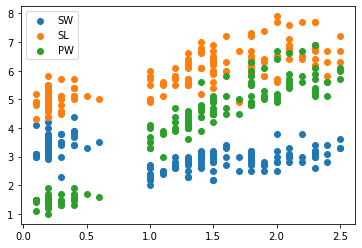

In [391]:
plt.figure()
plt.scatter(data.PW, data.SW)
plt.scatter(data.PW, data.SL)
plt.scatter(data.PW, data.PL)
plt.legend(["SW", "SL", "PW"])
plt.show()

# Perceptron

### Split train and test data

In [392]:
data = data.sample(frac = 1)
data_train = data[:int(80*150/100)]
data_test = data[int(80*150/100):]

In [411]:
data_test.head()

,SL,SW,PL,PW,Class
8,4.4,2.9,1.4,0.2,Iris-setosa
104,6.5,3.0,5.8,2.2,Iris-virginica
58,6.6,2.9,4.6,1.3,Iris-versicolor
26,5.0,3.4,1.6,0.4,Iris-setosa
139,6.9,3.1,5.4,2.1,Iris-virginica


In [412]:
data_train.head()

,SL,SW,PL,PW,Class
132,6.4,2.8,5.6,2.2,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica
11,4.8,3.4,1.6,0.2,Iris-setosa
108,6.7,2.5,5.8,1.8,Iris-virginica
134,6.1,2.6,5.6,1.4,Iris-virginica


In [395]:
Number_per_class = data.Class.value_counts()
Number_per_class

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Class, dtype: int64

In [396]:
Class_count = len(data.Class.value_counts())
Class_count

3

In [397]:
data_count = Number_per_class.sum()
data_count
N = data_count
N_train = len(data_train)
N_test = N - N_train

In [398]:
Class_indices_pd = data.Class
Class_indices_pd = pd.factorize(Class_indices_pd)
Class_indices_pd

(array([0, 0, 1, 0, 0, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 0, 1, 2, 2, 2, 0, 2,
        2, 0, 2, 0, 1, 0, 2, 0, 2, 1, 0, 0, 2, 2, 0, 1, 2, 1, 1, 0, 1, 0,
        2, 1, 0, 1, 1, 2, 2, 1, 2, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 0, 0, 1,
        0, 1, 2, 2, 1, 0, 0, 2, 2, 0, 0, 2, 2, 1, 0, 0, 2, 1, 2, 1, 2, 1,
        1, 2, 2, 1, 1, 2, 0, 0, 1, 1, 0, 2, 1, 2, 0, 1, 0, 1, 0, 2, 2, 0,
        2, 0, 0, 1, 2, 1, 0, 0, 1, 2, 1, 0, 2, 1, 0, 0, 1, 0, 2, 0, 1, 1,
        1, 0, 0, 0, 1, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 2, 0, 1], dtype=int64),
 Index(['Iris-virginica', 'Iris-setosa', 'Iris-versicolor'], dtype='object'))

In [399]:
Class_indices = Class_indices_pd[0]
Class_indices
T_train = Class_indices[:int(80*150/100)]
T_test = Class_indices[int(80*150/100):]

In [400]:
W = np.random.rand(5,3)
W = W.T
W

array([[0.45182335, 0.38648871, 0.61689067, 0.33328397, 0.91565597],
       [0.84037137, 0.37548383, 0.78894891, 0.90237906, 0.66757892],
       [0.56476557, 0.01151601, 0.58658673, 0.10865652, 0.33581046]])

In [401]:
X_train = data_train[data_train.columns.difference(["Class"])]
X_train = X_train.to_numpy()
Biais = np.ones((N_train,1))
X_train = np.concatenate((Biais, X_train),axis=1)

In [402]:
X_test = data_test[data_test.columns.difference(["Class"])]
X_test = X_test.to_numpy()
Biais = np.ones((N_test,1))
X_test = np.concatenate((Biais, X_test),axis=1)

In [403]:
k = 0
y_train = np.zeros(N_train)

In [404]:
while k<100 :
    k = k + 1
    for n in range (0, N_train):
        j = np.argmax(np.dot(W, X_train[n]))
        y_train[n] = j
        if (j != T_train[n]):
            W[j] = W[j] - 0.1 * X_train[n]
            W[T_train[n]] = W[T_train[n]] + 0.1 * X_train[n]

In [405]:
W

array([[-7.24817665, 12.63648871, 15.74689067, -7.93671603, -7.74434403],
       [ 2.24037137, -9.15451617, -4.57105109,  4.24237906,  8.26757892],
       [ 6.86476557, -2.70848399, -9.18341327,  5.03865652,  1.39581046]])

In [406]:
X_test

array([[1. , 1.4, 0.2, 4.4, 2.9],
       [1. , 5.8, 2.2, 6.5, 3. ],
       [1. , 4.6, 1.3, 6.6, 2.9],
       [1. , 1.6, 0.4, 5. , 3.4],
       [1. , 5.4, 2.1, 6.9, 3.1],
       [1. , 5.5, 1.8, 6.5, 3. ],
       [1. , 1.5, 0.2, 4.6, 3.1],
       [1. , 5.1, 2.4, 5.8, 2.8],
       [1. , 4.5, 1.5, 6. , 2.9],
       [1. , 6.7, 2. , 7.7, 2.8],
       [1. , 1.4, 0.2, 5.1, 3.5],
       [1. , 1.1, 0.1, 4.3, 3. ],
       [1. , 1.5, 0.1, 4.9, 3.1],
       [1. , 5.8, 1.6, 7.2, 3. ],
       [1. , 5.6, 2.4, 6.3, 3.4],
       [1. , 5.1, 1.9, 5.8, 2.7],
       [1. , 1.7, 0.3, 5.7, 3.8],
       [1. , 3.9, 1.1, 5.6, 2.5],
       [1. , 1.3, 0.2, 5.5, 3.5],
       [1. , 4.9, 2. , 5.6, 2.8],
       [1. , 4.2, 1.5, 5.9, 3. ],
       [1. , 1.5, 0.1, 4.9, 3.1],
       [1. , 6.1, 1.9, 7.4, 2.8],
       [1. , 4.6, 1.5, 6.5, 2.8],
       [1. , 1.5, 0.4, 5.4, 3.4],
       [1. , 5.6, 2.1, 6.4, 2.8],
       [1. , 4.5, 1.3, 5.7, 2.8],
       [1. , 3.7, 1. , 5.5, 2.4],
       [1. , 6.3, 1.8, 7.3, 2.9],
       [1. , 1

In [407]:
y

array([[ 16.77428472,   7.37816455,   1.84845605],
       [ 11.21690409,  40.02376277, -15.45369938],
       [ 10.78736059,  22.05294766,  -4.0890043 ],
       [ 26.28722826, -39.01097696,  32.14031332],
       [ 12.90610238,  21.94994136,  -4.70448508],
       [ 11.24866512,  28.81641961,  -7.45217222],
       [ 12.30828846,  25.71168881,  -5.06905184],
       [ 25.4164999 , -38.30679664,  30.04346405],
       [ 12.97522628,  19.08189506,  -3.3539529 ],
       [ 29.00958171, -46.23331348,  35.44894423],
       [ 15.2498024 ,   5.75967766,   3.62400987],
       [ 14.08811018,  15.1219318 ,   0.15343979],
       [ 11.33206398,  26.17285487,  -4.34379237],
       [ 26.01197769, -39.39213917,  30.4879349 ],
       [ 25.73195437, -38.36919779,  30.34666493],
       [ 15.96557138,   9.29480707,   2.6931515 ],
       [ 18.6195487 ,   4.50140736,   6.10293396],
       [ 16.72635136,   3.80055407,   6.45101458],
       [ 25.59557217, -36.38477026,  29.73298241],
       [ 14.91208913,  18.65800

In [408]:
y = (np.dot(W, X_test.T))
y = y.T
y_class = np.zeros(len(y))
for i in range(len(y)):
    y_class[i] = np.argmax(y[i])

In [409]:
error_test = T_test != y_class
error_test = error_test.astype(int).sum()
error_train = T_train != y_train
error_train = error_train.astype(int).sum()
print("Pourcentage de précision test : ", (N_test - error_test)*100/N_test)
print("Pourcentage de précision train : ", (N_train - error_train)*100/N_train)

Pourcentage de précision test :  96.66666666666667
Pourcentage de précision train :  90.83333333333333
